# Facial Keypoint Detection
by Vince Petaccio

---

The goal of this project is to explore OpenCV pre-processing and computer vision and deep learning techniques for edge detection, facial identification, and facial keypoint localization. The topics covered are:

* Haar cascade facial identification
* Eye detection within identified facial regions
* Noise reduction for improved facial identification
* Canny edge detection
* Blurring for improved edge detection
* Automated facial blurring
* Convolutional neural network (CNN) localization of facial keypoints 

**Libraries**

This code was developed using Python 3.5, Numpy 1.13, Matplotlib 2.2.2, Pillow 5.1.0, Keras 2.1.5 with TensorFlow 1.2.1, and OpenCV 3.2.0.

---
## Detecting Faces Using a Haar Cascade Classifier

Here, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces within images. One of OpenCV's pre-trained face detectors was employed, and is stored in the `detector_architectures` directory as an XML file.


In [1]:
# Import libraries

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import math
import cv2 
from PIL import Image
import time 

Next, we load and display a test image for performing face detection.

Since by default OpenCV assumes the ordering of our image's color channels are BGR, we first convert to RGB for easier, more intuitive manipulation.

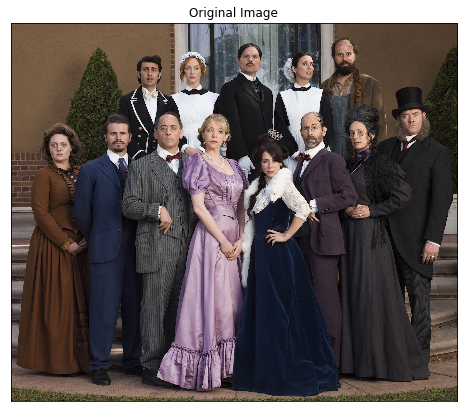

In [2]:
# Load in color image for face detection
image = cv2.imread('images/test_image_1.jpg')

# Convert the image to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot our image using subplots to specify a size and title
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Original Image')
ax1.imshow(image)

Since this Harr cascade face detector uses information about patterns of intensity in an image to reliably detect faces under varying light conditions, we'll first convert the image from color to grayscale to eliminate extraneous information.

Next, we load in the fully trained architecture of the face detector -- found in the file *haarcascade_frontalface_default.xml* - and use it on our image to find faces.

Number of faces detected: 13


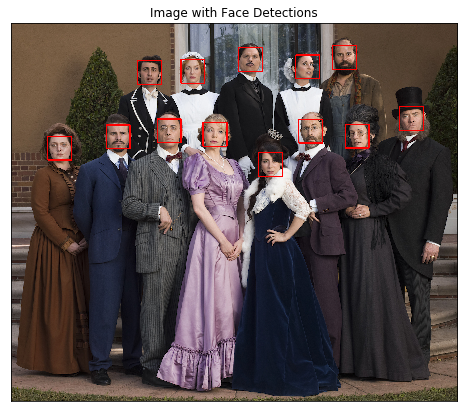

In [3]:
# Convert the RGB  image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Extract the pre-trained face detector from an xml file
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# Detect the faces in image
faces = face_cascade.detectMultiScale(gray, 4, 6)

# Print the number of faces detected in the image
print('Number of faces detected:', len(faces))

# Make a copy of the orginal image to draw face detections on
image_with_detections = np.copy(image)

# Get the bounding box for each detected face
for (x,y,w,h) in faces:
    # Add a red bounding box to the detections image
    cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)
    

# Display the image with the detections
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Image with Face Detections')
ax1.imshow(image_with_detections)

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

---
## Add Eye Detections

There are other pre-trained detectors available that use a Haar cascade classifier - including full human body detectors, license plate detectors, and more.  [A full list of the pre-trained architectures can be found here](https://github.com/opencv/opencv/tree/master/data/haarcascades). Here, we add eye detection within our facial regions. 

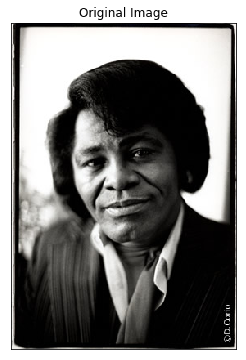

In [4]:
# Load in color image for face detection
image = cv2.imread('images/james.jpg')

# Convert the image to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot the RGB image
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Original Image')
ax1.imshow(image)

With the image loaded, we convert to grayscale and perform facial identification as above.

Number of faces detected: 1


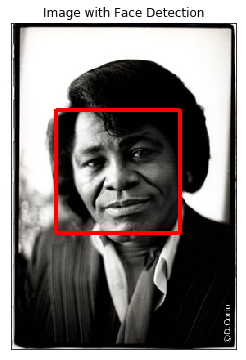

In [5]:
# Convert the RGB  image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Extract the pre-trained face detector from an xml file
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# Detect the faces in image
faces = face_cascade.detectMultiScale(gray, 1.25, 6)

# Print the number of faces detected in the image
print('Number of faces detected:', len(faces))

# Make a copy of the orginal image to draw face detections on
image_with_detections = np.copy(image)

# Get the bounding box for each detected face
for (x,y,w,h) in faces:
    # Add a red bounding box to the detections image
    cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)
    

# Display the image with the detections
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Image with Face Detection')
ax1.imshow(image_with_detections)

### Adding eye detection

To set up an eye detector, we use the stored parameters of the eye cascade detector, called ```haarcascade_eye.xml```, located in the `detector_architectures` subdirectory.

Since we've already run the face detector over this image, we search for eyes only *within the rectangular face regions detected in ``faces``*.  This will minimize false detections.

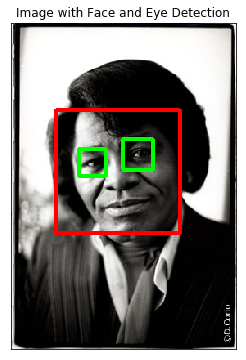

In [6]:
# Make a copy of the original image to plot rectangle detections
image_with_detections = np.copy(image)   

# Loop over the detections and draw their corresponding face detection boxes
for (x,y,w,h) in faces:
    cv2.rectangle(image_with_detections, (x,y), (x+w,y+h),(255,0,0), 3)  
    
# Add eye detection, using haarcascade_eye.xml, to the current face detector algorithm

# Define the eye classifier
eye_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_eye.xml')

# Loop over the detected face regions- search the cropped region for eyes
eyes = []
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
for (x,y,w,h) in faces:
    # Crop the image to this face
    face_image = gray[y: y+h, x: x+w]
    # Check for eyes in this face region
    face_eyes = eye_cascade.detectMultiScale(face_image, 1.05, 2)
    # Perform correction on the eye detection positions
    face_eyes[:, 0] += x
    face_eyes[:, 1] += y
    # Add the detected eyes to the list of all detected eyes
    eyes.append(face_eyes)

# Loop over the eye detections and draw their corresponding boxes in green on image_with_detections
for eye in eyes:
    for (x,y,w,h) in eye:
        cv2.rectangle(image_with_detections, (x,y), (x+w,y+h),(0,255,0), 3)

# Plot the image with both faces and eyes detected
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Image with Face and Eye Detection')
ax1.imshow(image_with_detections)

---
## Noise Reduction for Improved Face Detection

Image quality is an important aspect of any computer vision task. Typically, when creating a set of images to train a deep learning network, significant care is taken to ensure that training images are free of visual noise or artifacts that hinder object detection.  While computer vision algorithms - like a face detector - are typically trained on 'nice' data such as this, new test data doesn't always look so nice.

When applying a trained computer vision algorithm to a new piece of test data one often cleans it up first before feeding it in.  This pre-processing can include a number of cleaning phases like blurring, de-noising, color transformations, etc., and many of these tasks can be accomplished using OpenCV.

In this short subsection we explore OpenCV's noise-removal functionality to see how we can clean up a noisy image, which we then feed into our trained face detector.

### Create a noisy image to work with

In the next cell, we create an artificial noisy version of the previous multi-face image.  This is a little exaggerated - we don't typically get images that are this noisy - but [image noise](https://digital-photography-school.com/how-to-avoid-and-reduce-noise-in-your-images/), or 'grainy-ness' in a digitial image - is a fairly common phenomenon.

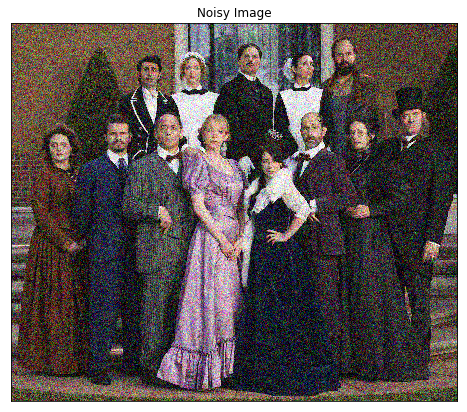

In [6]:
# Load in the multi-face test image again
image = cv2.imread('images/test_image_1.jpg')

# Convert the image copy to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Make an array copy of this image
image_with_noise = np.asarray(image)

# Create noise - here we add noise sampled randomly from a Gaussian distribution: a common model for noise
noise_level = 40
noise = np.random.randn(image.shape[0],image.shape[1],image.shape[2])*noise_level

# Add this noise to the array image copy
image_with_noise = image_with_noise + noise

# Convert back to uint8 format
image_with_noise = np.asarray([np.uint8(np.clip(i,0,255)) for i in image_with_noise])

# Plot our noisy image!
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Noisy Image')
ax1.imshow(image_with_noise)

In the context of face detection, the problem with an image like this is that  - due to noise - we may miss some faces or get false detections.  

In the next cell we apply the same trained OpenCV detector with the same settings as before, to see what sort of detections we get.

Number of faces detected: 12


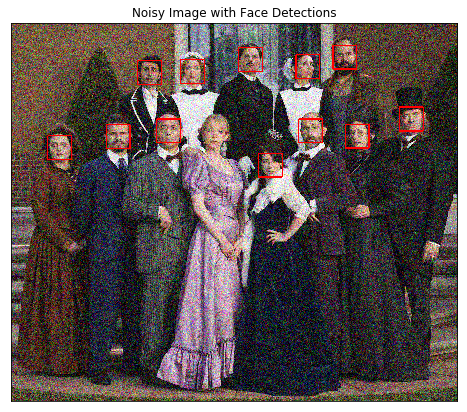

In [7]:
# Convert the RGB  image to grayscale
gray_noise = cv2.cvtColor(image_with_noise, cv2.COLOR_RGB2GRAY)

# Extract the pre-trained face detector from an xml file
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# Detect the faces in image
faces = face_cascade.detectMultiScale(gray_noise, 4, 6)

# Print the number of faces detected in the image
print('Number of faces detected:', len(faces))

# Make a copy of the orginal image to draw face detections on
image_with_detections = np.copy(image_with_noise)

# Get the bounding box for each detected face
for (x,y,w,h) in faces:
    # Add a red bounding box to the detections image
    cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)
    

# Display the image with the detections
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Noisy Image with Face Detections')
ax1.imshow(image_with_detections)

With this added noise we now miss one of the faces. Let's try and fix that!

### Noise reduction

Here we use OpenCV's built in color image de-noising functionality called ```fastNlMeansDenoisingColored``` to de-noise this image enough so that all the faces in the image are properly detected. Once we've cleaned the image up, we use the cell that follows to run our trained face detector over the cleaned image to check out its detections.

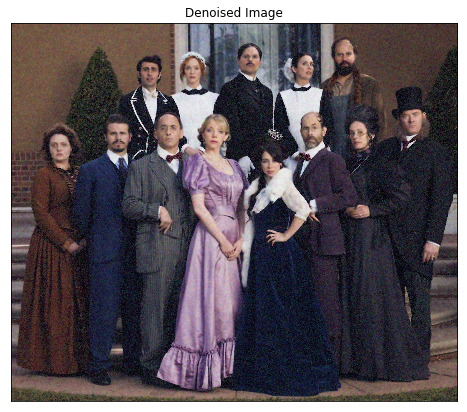

In [8]:
# Use OpenCV's built in color image de-noising function to clean up the noise
denoised_image = cv2.fastNlMeansDenoisingColored(image_with_noise, None, 30, 30, 21, 7)

fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Denoised Image')
ax1.imshow(denoised_image)

Number of faces detected: 13


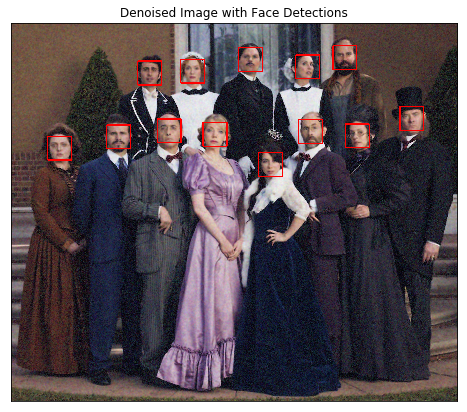

In [9]:
# Run the face detector on the de-noised image to improve facial detections, then display the result
# Convert the RGB  image to grayscale
gray_denoised = cv2.cvtColor(denoised_image, cv2.COLOR_RGB2GRAY)

# Detect the faces in image
faces = face_cascade.detectMultiScale(gray_denoised, 4, 6)

# Print the number of faces detected in the image
print('Number of faces detected:', len(faces))

# Make a copy of the orginal image to draw face detections on
image_with_detections = np.copy(denoised_image)

# Get the bounding box for each detected face
for (x,y,w,h) in faces:
    # Add a red bounding box to the detections image
    cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)
    

# Display the image with the detections
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Denoised Image with Face Detections')
ax1.imshow(image_with_detections)

---
## Blurring for Improved Edge Detection

### Importance of Blur in Edge Detection

Edge detection is a concept that pops up almost everywhere in computer vision applications, as edge-based features (as well as features built on top of edges) are often some of the best features for object detection and recognition problems and more.

Edge detection is a dimension reduction technique; by keeping only the edges of an image we get to throw away a lot of non-discriminating information.  And typically the most useful kind of edge-detection is one that preserves only the important, global structures (ignoring local structures that aren't very discriminative).  So removing local structures / retaining global structures is a crucial pre-processing step to performing edge detection in an image, and blurring can do just that. 

### Canny edge detection

In the cell below we load in a test image, then apply Canny edge detection to it.  The original image is shown on the left panel of the figure, while the edge-detected version of the image is shown on the right.  Notice how the result looks very busy - there are too many little details preserved in the image before it is sent to the edge detector.  When applied in computer vision applications, edge detection should preserve *global* structure; doing away with local structures that don't help describe what objects are in the image.

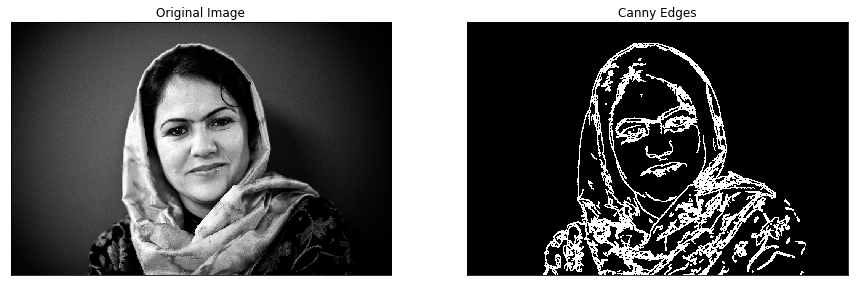

In [11]:
# Load in the image
image = cv2.imread('images/fawzia.jpg')

# Convert to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  

# Perform Canny edge detection
edges = cv2.Canny(gray,100,200)

# Dilate the image to amplify edges
edges = cv2.dilate(edges, None)

# Plot the RGB and edge-detected image
fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(121)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Original Image')
ax1.imshow(image)

ax2 = fig.add_subplot(122)
ax2.set_xticks([])
ax2.set_yticks([])

ax2.set_title('Canny Edges')
ax2.imshow(edges, cmap='gray')

Without first blurring the image, and removing small, local structures, a lot of irrelevant edge content gets picked up and amplified by the detector (as shown in the right panel above). 

### Blurring the image *then* perform edge detection

In the next cell, we repeat this experiment - blurring the image first to remove these local structures, so that only the important boudnary details remain in the edge-detected image.

We blur the image by using OpenCV's ```filter2d``` functionality - which is discussed in [this documentation page](http://docs.opencv.org/3.1.0/d4/d13/tutorial_py_filtering.html) - and use an *averaging kernel* of width 4.

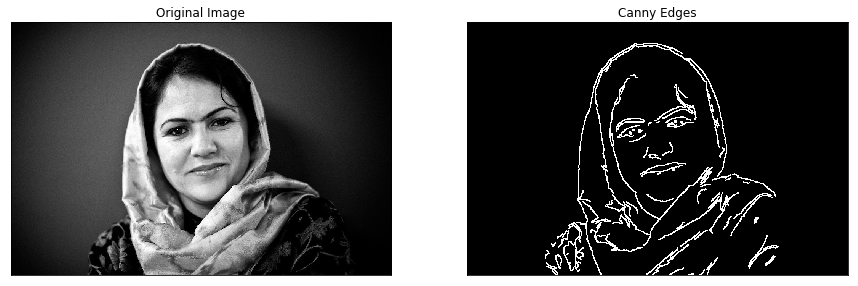

In [12]:
# Blur the test image using OpenCV's filter2d functionality, 
# Use an averaging kernel, and a kernel width equal to 4
kernel = np.ones((4, 4), np.float32) / 16
blurred_image = cv2.filter2D(gray, -1, kernel)

# Perform Canny edge detection
edges = cv2.Canny(blurred_image, 100, 200)

# Dilate the image to amplify edges
edges = cv2.dilate(edges, None)

# Plot the RGB and edge-detected image
fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(121)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Original Image')
ax1.imshow(image)

ax2 = fig.add_subplot(122)
ax2.set_xticks([])
ax2.set_yticks([])

ax2.set_title('Canny Edges')
ax2.imshow(edges, cmap='gray')

---
## Automatically Hiding the Identity of an Individual

When filming something like a documentary or reality TV, it's important to obtain permission from every individual shown on film before you can show their face, otherwise the face must be blurred significantly (so much so that even the global structures are obscured).  This is also true for projects like [Google's StreetView maps](https://www.google.com/streetview/).  Because it would be impossible for Google to get the permission of every single person accidentally captured in one of these images they blur out everyone's faces, the detected images must automatically blur the identity of detected people.  Here's a few examples of folks caught in the camera of a Google street view vehicle.

<img src="images/streetview_example_1.jpg" width=400 height=300/>
<img src="images/streetview_example_2.jpg" width=400 height=300/>


### Read in an image to perform identity detection

Using the face detection pipeline built above and what we know about using ```filter2D``` to blur images, we'll use these in tandem to hide the identity of the person in the following image - loaded in and printed in the next cell. 

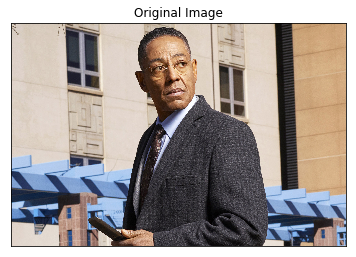

In [13]:
# Load in the image
image = cv2.imread('images/gus.jpg')

# Convert the image to RGB colorspace
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Original Image')
ax1.imshow(image)

### Using blurring to hide the identity of an individual in an image

The idea here is to 1) automatically detect the face in this image, and then 2) blur it out. We'll be sure to adjust the parameters of the *averaging* blur filter to completely obscure this person's identity.

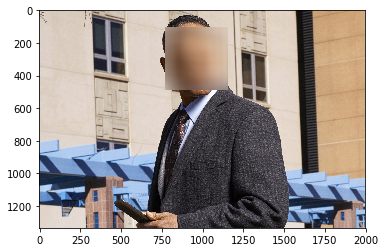

In [14]:
# Backup the image
image_copy = np.copy(image)

# Convert to greyscale
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)

# Extract classifier
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# Detect the face
faces = face_cascade.detectMultiScale(gray, 1.2, 4)

# Blur the bounding box around each detected face using an averaging filter and display the result

# Make a very blurred copy of the image
kernel = np.ones((200, 200), np.float32) / 40000
blurred_image = cv2.filter2D(image, -1, kernel)

# Backup the original
no_face = np.copy(image)

for (x,y,w,h) in faces:
    # Replace the original image with the blurred pixels
    no_face[y:y+h, x:x+w] = blurred_image[y:y+h,x:x+w]
    
# Display the blurred image
plt.imshow(no_face)

---
## Creating a CNN to Recognize Facial Keypoints

In practice, OpenCV is often used in combination with other machine learning and deep learning libraries to produce interesting results.  In this section we will create an end-to-end pipeline - employing convolutional networks in Keras along with OpenCV - to identify facial keypoints.  

We begin by creating and then training a convolutional network that can detect facial keypoints in a small dataset of cropped images of human faces. 

<img src="images/keypoints_test_results.png" width=400 height=300/>

Facial keypoints (also called facial landmarks) are the small blue-green dots shown on each of the faces in the image above - there are 15 keypoints marked in each image.  They mark important areas of the face - the eyes, corners of the mouth, the nose, etc.  Facial keypoints can be used in a variety of machine learning applications from face and emotion recognition to commercial applications like the image filters popularized by Snapchat.

### Making a facial keypoint detector

At a high level, facial keypoint detection is a *regression problem*.  A single face corresponds to a set of 15 facial keypoints (a set of 15 corresponding $(x, y)$ coordinates, i.e., an output point).  Because our input data are images, we can employ a *convolutional neural network* to recognize patterns in our images and learn how to identify these keypoint given sets of labeled data.

In order to train a regressor, we need a training set - a set of facial image / facial keypoint pairs to train on.  For this we will be using [this dataset from Kaggle](https://www.kaggle.com/c/facial-keypoints-detection/data). The data set has already been downloaded and placed in the `data` directory. The training dataset contains several thousand $96 \times 96$ grayscale images of cropped human faces, along with each face's 15 corresponding facial keypoints (also called landmarks) that have been placed by hand, and recorded in $(x, y)$ coordinates. This wonderful resource also has a substantial testing set, which we will use in exploring our convolutional network.

To load in this data, we use the `load_data` function from the included `utils.py` file.

In [74]:
from utils import *

# Load training set
X_train, y_train = load_data()
print("X_train.shape == {}".format(X_train.shape))
print("y_train.shape == {}; y_train.min == {:.3f}; y_train.max == {:.3f}".format(
    y_train.shape, y_train.min(), y_train.max()))

# Load testing set
X_test, _ = load_data(test=True)
print("X_test.shape == {}".format(X_test.shape))

X_train.shape == (2140, 96, 96, 1)
y_train.shape == (2140, 30); y_train.min == -0.920; y_train.max == 0.996
X_test.shape == (1783, 96, 96, 1)


Note that the output values - that is, the coordinates of each set of facial landmarks - have been normalized to take on values in the range $[-1, 1]$, while the pixel values of each input point (a facial image) have been normalized to the range $[0,1]$.  

### Visualize the Training Data

Let's take a moment to visualize a subset of the training data.

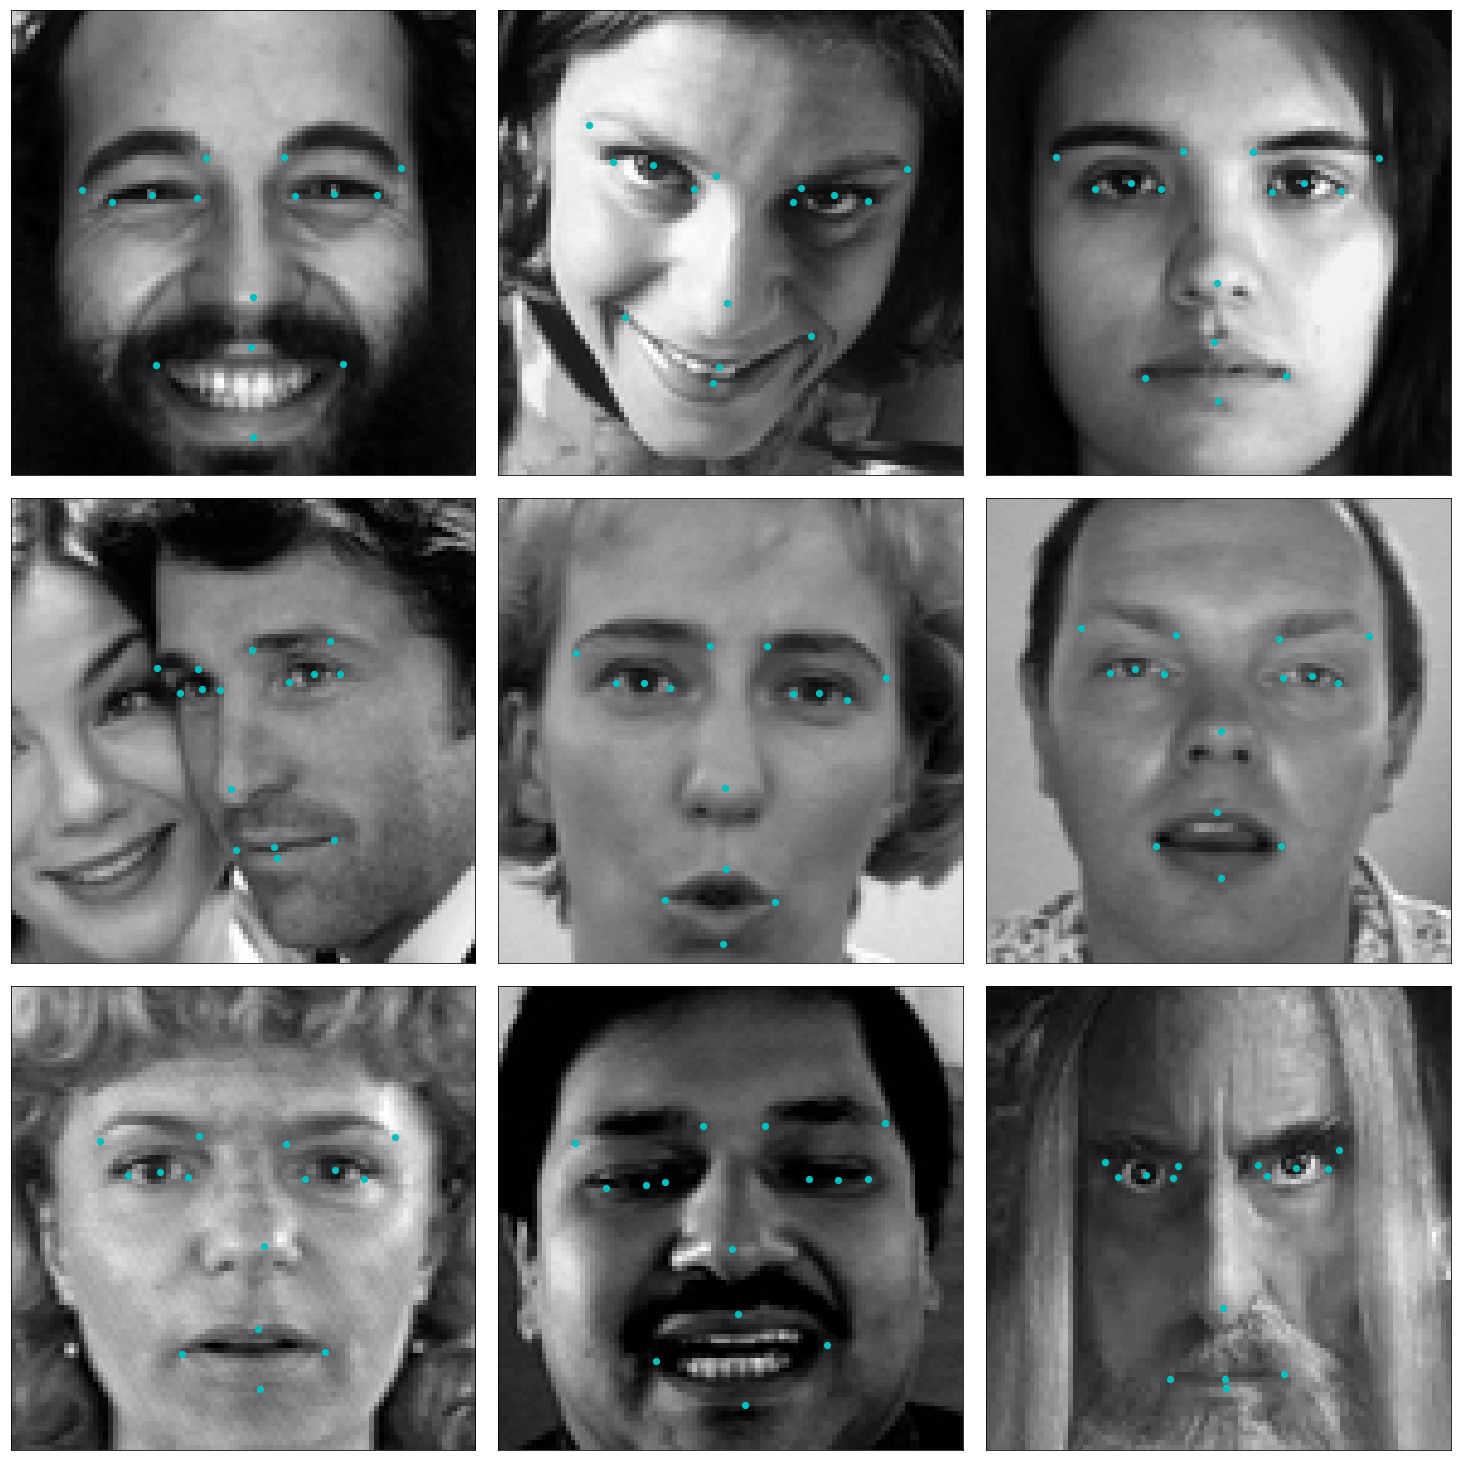

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    plot_data(X_train[i], y_train[i], ax)

For each training image, there are two landmarks per eyebrow (**four** total), three per eye (**six** total), **four** for the mouth, and **one** for the tip of the nose. 

### Specifying the CNN Architecture

In this section, we specify a convolutional neural network for predicting the locations of facial keypoints.

Our network accepts a $96 \times 96$ grayscale image as input, and outputs a vector with 30 entries, corresponding to the predicted (horizontal and vertical) locations of 15 facial keypoints.

The architecture of this network employs three convolutional layers, each followed by a max-pooling layer for dimensionality reduction, with a two-layer dense regression output component. This will allow us to accept $96 \times 96$ grayscale images as inputs and output a 30-value vector.

In [146]:
# Import deep learning resources from Keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout
from keras.layers import Flatten, Dense


# Specify the CNN architecture
model = Sequential()
# Convolutional layer
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(96, 96, 1)))
# Max Pooling
model.add(MaxPooling2D(pool_size=2))
# Convolutional layer
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=2))
# Convolutional layer
model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=2))
# Flatten the layer for connection to dense layer
model.add(Flatten())
# Dense layers
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
# Output layer
model.add(Dense(30))

# Summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_73 (Conv2D)           (None, 96, 96, 32)        320       
_________________________________________________________________
max_pooling2d_73 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 48, 48, 64)        18496     
_________________________________________________________________
max_pooling2d_74 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 24, 24, 128)       32896     
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 12, 12, 128)       0         
_________________________________________________________________
flatten_24 (Flatten)         (None, 18432)             0         
__________

---
## Compile and Train the Model

After specifying the model architecture, we'll need to compile and train the model to detect facial keypoints.

### Compile and Train the Model

Although steps were taken to reduce the dimensionality of the model as described above, it is nonetheless highly parameterized. To ensure that training is not prohibitively slow, we prefer optimizers which effectively employ adaptive learning rates for each parameter. This leads us first to Adagrad, which performs best on sparse data due to the huge number of independent learning rates which must be calculated and stored. One downside of this optimizer is a vulnerability to vanishing gradients. In order to address this weakness, Adadelta was next explored; this is an extension of Adagrad which seeks to address its weaknesses by limiting the "memory" of previous learning rates for each parameter in order to avoid vanishing gradients.

A feature that Adagrad and Adadelta lack is a strong sense of momentum- this is included in the Adam optimizer. To evaluate the effectiveness of including this feature, Adam was also explored as a potential candidate optimizer for this network.

Empirical testing was performed by training the same model architecture for 250 epochs with each of the above optimizers, using a default learning rate of 0.01. Training was performed on a p2xlarge EC2 GPU instance. The final results for each are shown below:

--------------------------------

**Adagrad**

Validation loss: 0.0053

Validation accuracy: 0.7383

Training time: 613.62 s

**Adadelta**

Validation loss: 0.0281

Validation accuracy: 0.6963

Training time: 717.34 s

**Adam**

Validation loss: 0.0024

Validation accuracy: 0.7196

Training time: 666.42 s

--------------------------------

Notably, the Adam optimizer model showed a significant increase in loss after approximately 120 epochs. After 80 epochs, validation loss was around 0.14. Based upon these results, the Adam optimizer was used, and was trained for 100 epochs. 


In [147]:
from keras.optimizers import Adagrad, Adadelta, Adam

# Define the number of epochs
epochs = 100

# Define the optimizer
optimizer = Adam(lr=0.01)

# Compile the model
model.compile(loss='mse', optimizer=optimizer, metrics=['accuracy'])

start = time.time()

# Train the model
hist2 = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_split=0.2, verbose=2)

stop = time.time()

print('\nTraining for {} epochs took {} seconds.'.format(epochs, stop-start))

# Save the model as model.h5
model.save('my_model.h5')

Train on 1712 samples, validate on 428 samples
Epoch 1/100
3s - loss: 13.0603 - acc: 0.4877 - val_loss: 0.0047 - val_acc: 0.6963
Epoch 2/100
2s - loss: 0.0045 - acc: 0.7074 - val_loss: 0.0044 - val_acc: 0.6963
Epoch 3/100
2s - loss: 0.0045 - acc: 0.7074 - val_loss: 0.0044 - val_acc: 0.6963
Epoch 4/100
2s - loss: 0.0045 - acc: 0.7074 - val_loss: 0.0044 - val_acc: 0.6963
Epoch 5/100
2s - loss: 0.0046 - acc: 0.7074 - val_loss: 0.0048 - val_acc: 0.6963
Epoch 6/100
2s - loss: 0.0045 - acc: 0.7074 - val_loss: 0.0047 - val_acc: 0.6963
Epoch 7/100
2s - loss: 0.0046 - acc: 0.7074 - val_loss: 0.0056 - val_acc: 0.6963
Epoch 8/100
2s - loss: 0.0046 - acc: 0.7074 - val_loss: 0.0044 - val_acc: 0.6963
Epoch 9/100
2s - loss: 0.0045 - acc: 0.7074 - val_loss: 0.0044 - val_acc: 0.6963
Epoch 10/100
2s - loss: 0.0045 - acc: 0.7074 - val_loss: 0.0048 - val_acc: 0.6963
Epoch 11/100
2s - loss: 0.0045 - acc: 0.7074 - val_loss: 0.0044 - val_acc: 0.6963
Epoch 12/100
2s - loss: 0.0045 - acc: 0.7074 - val_loss: 0.

2s - loss: 8.2217e-04 - acc: 0.8002 - val_loss: 0.0018 - val_acc: 0.7430
Epoch 100/100
2s - loss: 8.3617e-04 - acc: 0.8037 - val_loss: 0.0018 - val_acc: 0.7523

Training for 100 epochs took 250.688978433609 seconds.


---
## Visualizing the Loss and Test Predictions

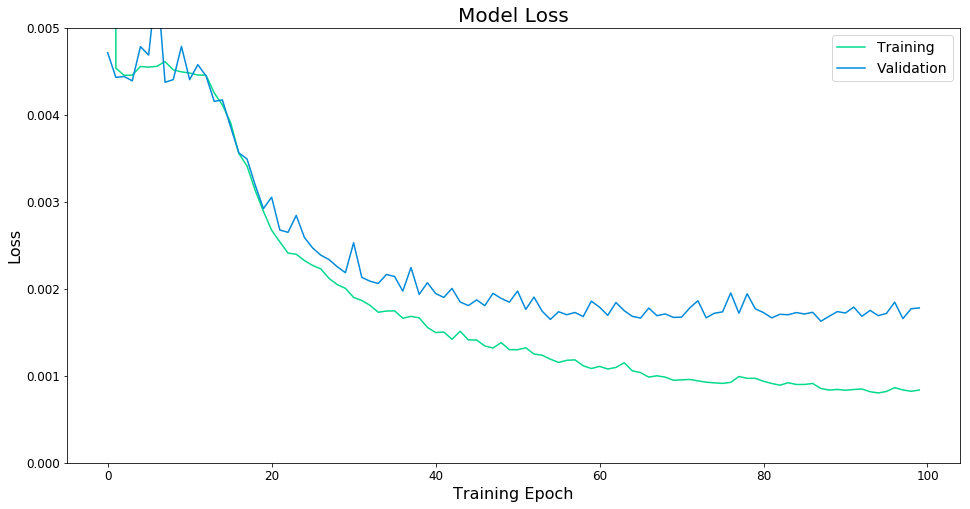

In [148]:
# Plot training and validation loss
fig = plt.figure(figsize = (16, 8))
ax1 = fig.add_subplot(111)
ax1.plot(hist2.history['loss'], color='#00DA8A')
ax1.plot(hist2.history['val_loss'], color='#008ADA')
plt.ylim([0, 0.005])
ax1.tick_params(axis='both', labelsize=12)
plt.title('Model Loss', fontsize=20)
plt.ylabel('Loss', fontsize=16)
plt.xlabel('Training Epoch', fontsize=16)
plt.legend(['Training', 'Validation'], fontsize=14)
plt.show()

There is some evidence of underfitting here, though as mentioned above with the Adam optimizer there is an epoch at which a sudden increase in validation loss is noted with this model and data set, with no further reduction observed. For this reason, it was necessary to find a number of training epochs which balanced the need to perform adequate training with the need to avoid this sudden increase in loss.

With that said, validation loss appears to have leveled off here, reaching a steady-state value of roughly 0.0016; this seems an appropriate place to stop the training process before overfitting occurs.

### Visualize a Subset of the Test Predictions

Let's take a look at how our model performs on some of the test data.

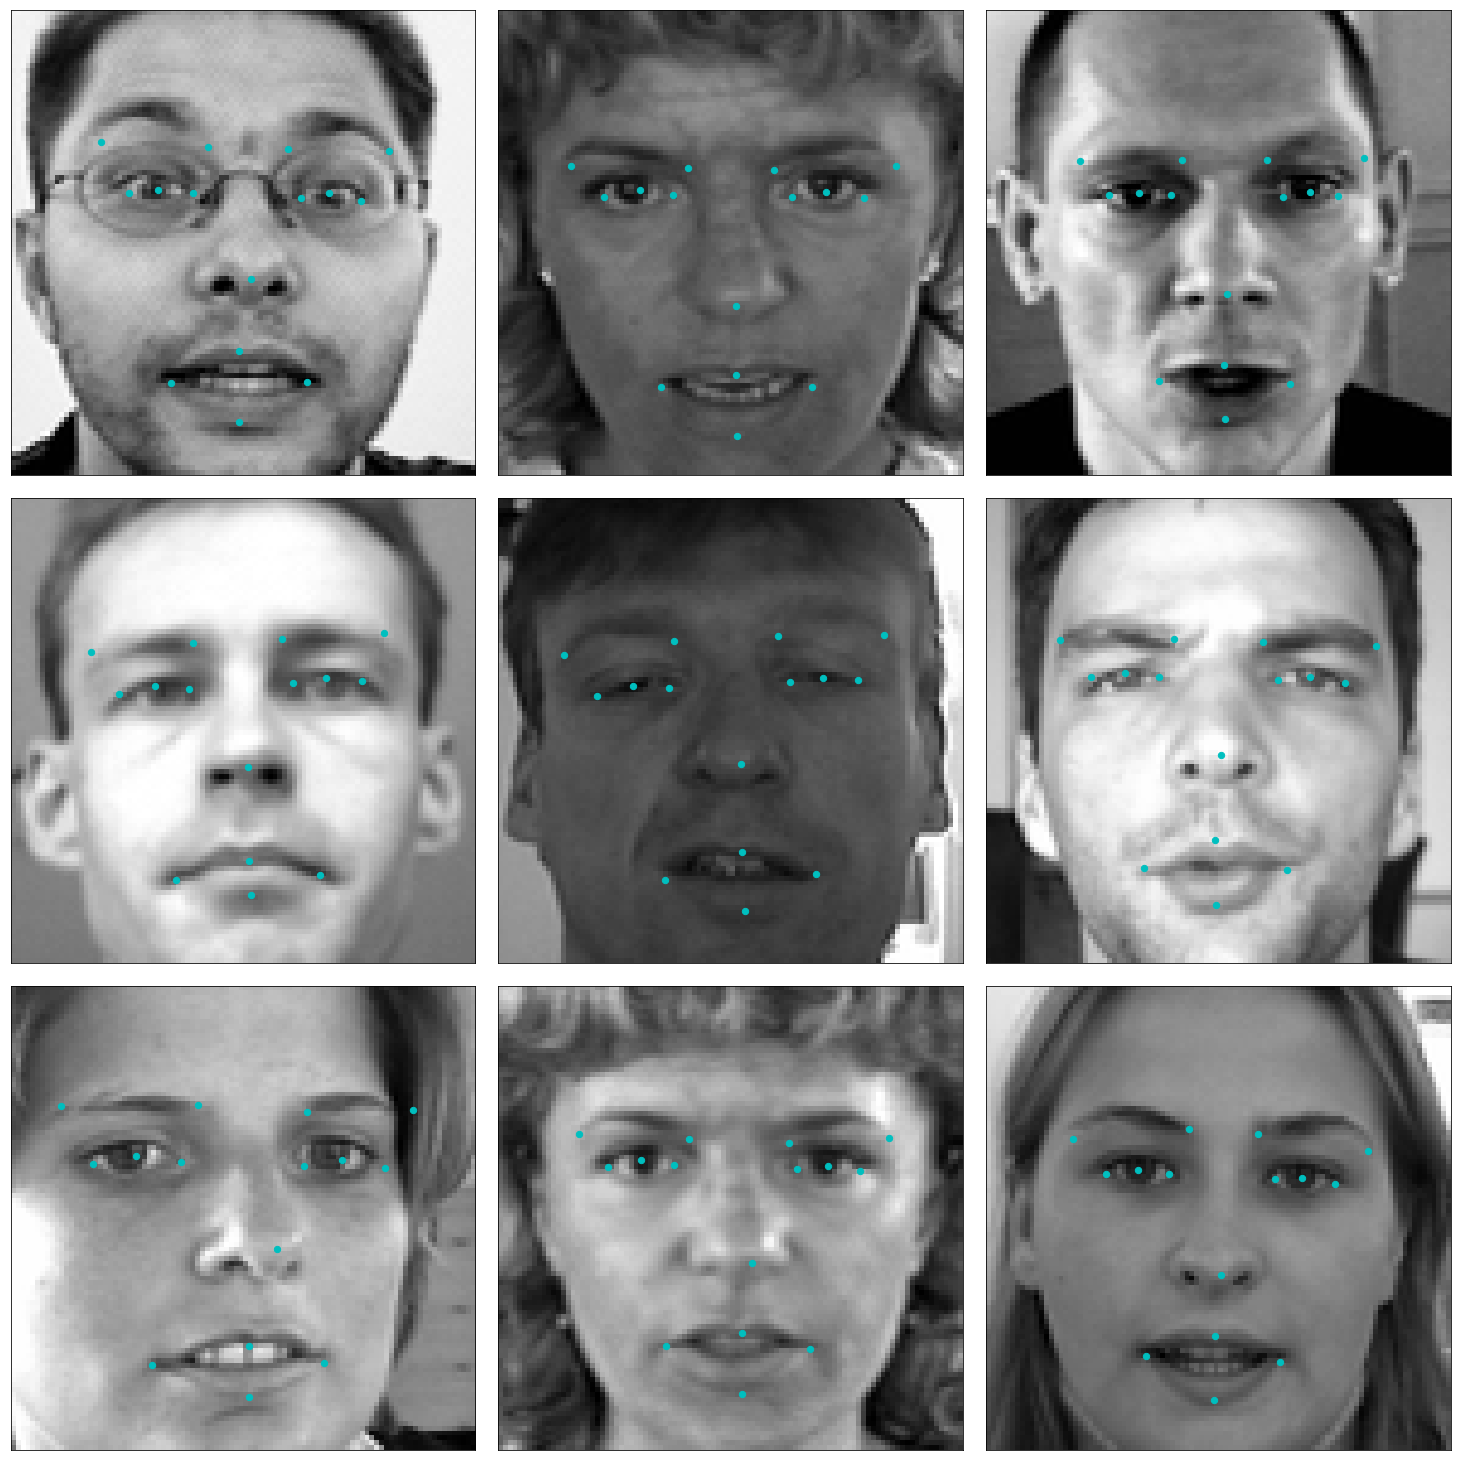

In [149]:
y_test = model.predict(X_test)
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    plot_data(X_test[i], y_test[i], ax)

---
## Completing the pipeline

We're now ready to complete the full pipeline. That is, given a color image containing a person or persons, we can now 

- Detect the faces in this image automatically using OpenCV
- Predict the facial keypoints in each face detected in the image
- Paint predicted keypoints on each face detected

### Facial Keypoints Detector

Using the OpenCV face detection functionality we built in previous sections, we'll expand the functionality of our keypoints detector to color images with arbitrary size.  Our function should perform the following steps:

1. Accept a color image.
2. Convert the image to grayscale.
3. Detect and crop the face contained in the image.
4. Locate the facial keypoints in the cropped image.
5. Overlay the facial keypoints in the original (color, uncropped) image.

When we're done, we should be able to produce example images like the one below

<img src="images/obamas_with_keypoints.png" width=1000 height=1000/>

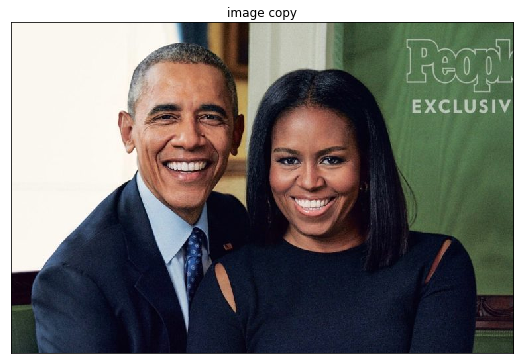

In [150]:
# Load in color image for face detection
image = cv2.imread('images/obamas4.jpg')

# Convert the image to RGB colorspace
image_copy = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plot our image
fig = plt.figure(figsize = (9,9))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('image copy')
ax1.imshow(image_copy)

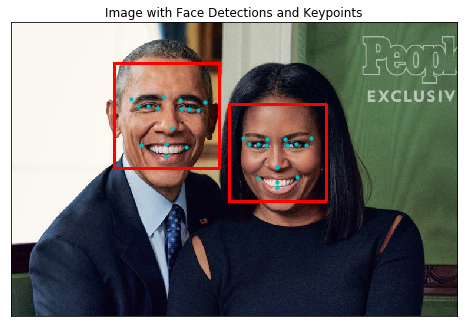

In [151]:
# Convert to greyscale
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)

face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# Detect the faces in image
faces = face_cascade.detectMultiScale(gray, 1.1, 6)

# Make a copy of the orginal image to draw face detections on
image_with_detections = np.copy(image_copy)

normed_faces = []
face_sizes = []

# Get the bounding box for each detected face
for (x,y,w,h) in faces:
    # Add a red bounding box to the detections image
    cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 3)
    
    # Crop the face area as a greyscale image of size 96x96
    face_crop = gray[y:y+h, x:x+w]
    face_sizes.append(face_crop.shape[0])
    face_resize = cv2.resize(face_crop, (96, 96)).reshape((96, 96, 1))
        
    # Normalize pixel values to [0, 1]
    face_norm = (1.0 * face_resize) / np.max(face_resize)
    
    normed_faces.append(face_norm)

# Paint the predicted keypoints on the test image
    
# Compile the faces into a batch suitable for input to the model
face_batch = np.array(normed_faces).reshape((len(normed_faces), 96, 96, 1))

# Get the facial keypoints
keypoints = model.predict(face_batch)

# Get the actual keypoint coordinates for the entire image, and denormalize
face_num = 0
for (x,y,w,h) in faces:
    keypoints[face_num][0::2] = keypoints[face_num][0::2] * (face_sizes[face_num] / 2.0) + (face_sizes[face_num] / 2.0) + x
    keypoints[face_num][1::2] = keypoints[face_num][1::2] * (face_sizes[face_num] / 2.0) + (face_sizes[face_num] / 2.0) + y
    face_num += 1
    
# Reset the face number
face_num = 0
    
# Display the image with the detections
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Image with Face Detections and Keypoints')
ax1.imshow(image_with_detections)
for face_num in range(len(faces)):
    ax1.scatter(keypoints[face_num][0::2], keypoints[face_num][1::2], marker='o', color='c', s=10)

---
## Conclusion

In this notebook, we successfully demonstrated the following techniques:

* Haar cascade facial identification
* Eye detection within identified facial regions
* Noise reduction for improved facial identification
* Canny edge detection
* Blurring for improved edge detection
* Automated facial blurring
* Convolutional neural network (CNN) localization of facial keypoints 

These techniques offer powerful tools for computer vision and image processing.

I hope you enjoyed reading this notebook!